<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Outlier removal using ZScore
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• Outliers are data points that deviate significantly from the overall pattern of a dataset. 
<br>
• Their presence can have a profound effect on statistical models and analyses, influencing results and interpretations in various ways. 
<br>
<br>
<strong>Types of Outliers</strong>
<br>
• Univariate Outliers: Points that stand out in a single variable's distribution (e.g., a very high income in a dataset of household incomes).
<br>
• Multivariate Outliers: Points that are unusual when considering multiple variables together (e.g., a person with both a high income and low education level).
<br>
<br>
Capping and trimming are two techniques used to manage outliers in datasets. They help mitigate the influence of extreme values while preserving the overall data structure.
<br>
<strong>1. Capping</strong>
<br>
Capping involves setting a threshold beyond which data points are adjusted to a specific maximum or minimum value.
<br>
This technique is often referred to as "winsorizing."
<br>
<strong>How it Works</strong>
<br>
• Upper Capping: Any data point above a certain threshold is replaced with that threshold value.
<br>
• Lower Capping: Any data point below a certain threshold is replaced with that threshold value.
<br>
<strong>2. Trimming</strong>
<br>
• Trimming involves removing a certain percentage of the data from the extremes of the distribution. 
<br>
• This means discarding data points that fall below or above specified value.
<br>
<strong>How it Works</strong>
<br>
• Upper Trimming: Remove the top X% of data points (e.g., the top 5%).
<br>
• Lower Trimming: Remove the bottom X% of data points (e.g., the bottom 5%).
<br>
<br>
<strong>When to use Capping vs Trimming</strong>
<br>
• Capping is often preferred when you want to retain all data points but minimize the influence of extreme values.
<br>
• Trimming is useful when you are confident that the extremes do not represent the underlying process or phenomenon being studied and when you are comfortable with losing some data.
</div>

In [158]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# Reading CSV File
df = pd.read_csv("placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
812,5.99,23.0,0
349,8.12,16.0,0
822,7.33,32.0,1
541,6.11,18.0,1
772,6.63,26.0,0


In [160]:
# Shape of the DataFrame
df.shape

(1000, 3)

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• Outlier removal using the Z-score method is a common statistical technique that identifies outliers based on their distance from the mean in terms of standard deviations. 
<br>
<br>
Here’s a detailed explanation of how it works :
<br>
<br>
<strong>What is ZScore?</strong>
<br>
• The Z-score indicates how many standard deviations a data point is from the mean of the dataset. It is calculated using the formula :
    
$$Z = \frac{(X - \mu)}{\sigma}$$
where:
<br>
• $Z$ = Z-score
<br>
• $X$ = Individual data point
<br>
• $\mu$ = Mean of the dataset
<br>
• $\sigma$ = Standard deviation of the dataset
<br>
<strong>Steps for Outlier Removal using ZScore</strong>
<br>
• First, compute the mean $\mu$ and standard deviation $\sigma$ of the dataset.
<br>
• For each data point in the dataset, compute the Z-score using the formula above.
<br>
• Common thresholds for identifying outliers are typically set at $Z > 3$ or $Z < -3$.
<br>
• This means that any data point with a Z-score greater than 3 or less than -3 is considered an outlier.
<br>
• Flag the data points that exceed the chosen Z-score threshold.
<br>
• Depending on your analysis, you can either remove these outliers from the dataset or treat them differently (e.g., capping).
<br>
<br>
<strong>Considerations</strong>
<br>
• The Z-score method assumes that the data is approximately normally distributed. If the distribution is skewed, the Z-score may not be an effective method.
<br>
• In datasets with many outliers, consider using robust methods like the modified Z-score, which uses the median and median absolute deviation (MAD) instead of the mean and standard deviation.
<br>
• The Z-score method may be less reliable with smaller sample sizes, as outliers can disproportionately influence the mean and standard deviation.
</div>

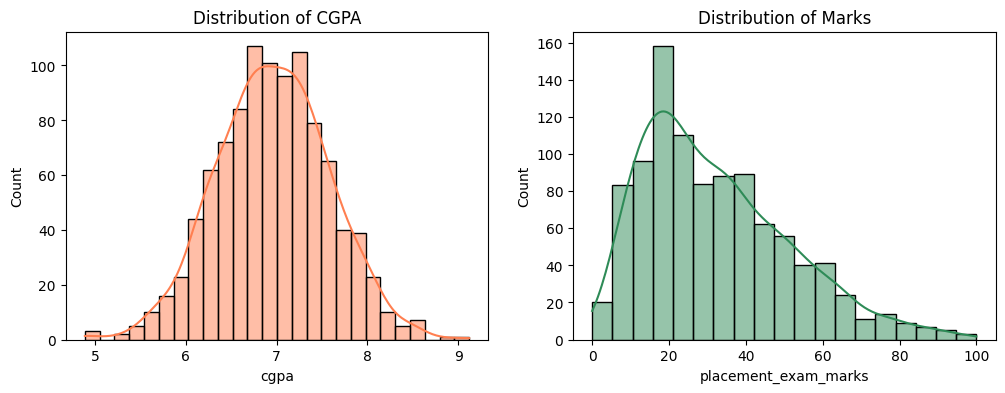

In [161]:
# Distribution of CGPA and Marks Column
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(df["cgpa"], kde=True, color="coral", ax=ax[0])
ax[0].set_title("Distribution of CGPA")
sns.histplot(df["placement_exam_marks"], kde=True, color="seagreen", ax=ax[1])
ax[1].set_title("Distribution of Marks")
plt.show()

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Finding outlier's using Range of values</strong>
<br>
• This expression specifies a range around the mean, where the mean is the average of the dataset and standard deviation measures the spread of the data.
<br>
• In a normally distributed dataset, approximately 99.7% of the data points fall within this range. 
<br>
• This is known as the empirical rule (or 68-95-99.7 rule)
<br>
1. About 68% of data points fall within 1 standard deviation (μ±1σ).
<br>
2. About 95% fall within 2 standard deviations (μ±2σ).
<br>
3. About 99.7% fall within 3 standard deviations (μ±3σ).
<br>
• This range helps identify outliers. Any data point outside this range can be flagged as an outlier.
</div>

In [162]:
# Mean of CGPA Column
mean_cgpa = df["cgpa"].mean()
print("Mean of CGPA Column :", mean_cgpa)

# Standard Deviation of CGPA Column
std_cgpa = df["cgpa"].std()
print("Standard Deviation of CGPA Column :", std_cgpa)

Mean of CGPA Column : 6.96124
Standard Deviation of CGPA Column : 0.6158978751323896


In [163]:
# Upper limit for Outlier
upper_limit = mean_cgpa + 3*std_cgpa
print("Upper Limit of CGPA Column :", upper_limit)

# Lower limit for Outlier
lower_limit = mean_cgpa - 3*std_cgpa
print("Lower Limit of CGPA Column :", lower_limit)

Upper Limit of CGPA Column : 8.808933625397168
Lower Limit of CGPA Column : 5.113546374602832


<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Trimming
    </p>
</div>

---

In [164]:
# Data that are potentially Outlier
df[(df["cgpa"] > upper_limit) | (df["cgpa"] < lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [165]:
# Trimming DataFrame
trim_df = df[(df["cgpa"] < upper_limit) & (df["cgpa"] > lower_limit)]
trim_df.sample(5)

,cgpa,placement_exam_marks,placed
279,8.49,40.0,1
404,8.02,35.0,1
614,8.05,41.0,0
361,6.37,37.0,1
454,7.13,53.0,0


In [166]:
# Shape of the DataFrame after Trimming
trim_df.shape

(995, 3)

In [167]:
# ZScore for CGPA Column
df["cgpa_zscore"] = (df["cgpa"] - mean_cgpa)/std_cgpa

In [168]:
# Sample of the DataFrame
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
833,7.29,23.0,1,0.533790
317,7.47,19.0,0,0.826046
723,7.35,10.0,1,0.631209
899,7.62,8.0,1,1.069593
682,6.34,17.0,1,-1.008674


In [169]:
# Data that are potentially Outlier
df[(df["cgpa_zscore"] > 3) | (df["cgpa_zscore"] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [170]:
# Trimming DataFrame
zscore_df = df[(df["cgpa_zscore"] < 3) & (df["cgpa_zscore"] > -3)]
zscore_df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
683,6.50,69.0,0,-0.748890
844,7.62,18.0,1,1.069593
427,6.17,39.0,1,-1.284694
146,6.75,22.0,1,-0.342979
94,7.15,21.0,1,0.306479


In [171]:
# Shape of the DataFrame after Trimming 
zscore_df.shape

(995, 4)

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Capping
    </p>
</div>

---

In [172]:
# Capping values that are Outlier
cap_df = df.copy()
cap_df["cgpa"] = np.where(
    df["cgpa"]>upper_limit, upper_limit, 
    np.where(df["cgpa"]<lower_limit, lower_limit, df["cgpa"]
    )
)

In [173]:
# Shape of the DataFrame after Capping
cap_df.shape

(1000, 4)

In [174]:
# Sample of the DataFrame
cap_df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
436,6.31,19.0,0,-1.057383
237,7.14,52.0,1,0.290243
890,7.73,30.0,0,1.248194
225,7.36,13.0,1,0.647445
668,7.24,47.0,0,0.452608
